<a href="https://colab.research.google.com/github/kkamal11/MLT/blob/main/Perceptron_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
from matplotlib import pyplot as plt

## Dataset



make_classification is used for creating synthetic classification dataset
- n_samples: no of samples
- n_features: no of features
- n_informative: no of informative features
- n_redundant: no of redundant features
- n_cluster_per_class:
- flip_y:

In [16]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0, class_sep = 3, random_state=20)

## 1
How many samples are there in the dataset?


In [17]:
X[:3]

array([[ 4.35809465, -4.19871954],
       [ 2.70007032, -2.60830647],
       [ 2.92613113, -2.17831489]])

In [18]:
X.shape[0]

50

## 2

How many features are there in the dataset?


In [19]:
X.shape[1]

2

## 3
In the target vector $y$, replace all occurrences of 0 with -1. 



In [20]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0])

In [21]:
y[y == 0] = -1

In [22]:
y

array([ 1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1])

## 4

How many unique classes are there in the target vector?


In [14]:
np.unique(y)

array([-1,  1])

## 5
Plot the data keeping first feature on the x-axis and the second feature on the y-axis. Plot the data points belonging to each class in different colors. Does the data seem linearly separable?

In [38]:
X[:,0][y == 1]

array([4.35809465, 2.70007032, 2.92613113, 2.70492468, 1.40403442,
       3.03688252, 2.74256066, 3.55224854, 4.2121494 , 3.56210053,
       1.19234332, 1.94746997, 3.09959095, 3.77398178, 1.95338326,
       4.13223512, 3.61161689, 2.28603659, 3.27785771, 3.44739526,
       2.43697964, 2.3377644 , 3.47758161, 0.85750064, 3.21773047])

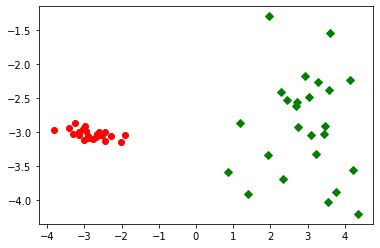

In [96]:
plt.plot(X[:,0][y == -1],X[:,1][y == -1],'ro')  #since we are using plot instead of scatter we need to pass the marker 'o'
plt.plot(X[:,0][y == 1],X[:,1][y == 1],'gD')
plt.show()

## 6
Initialize w to be a zero vector, with shape equal to the number of features in the data.



In [87]:
w = np.zeros(X.shape[1])
w

array([0., 0.])

## 7 
Iterate over each data point $x$ in $X$ one by one (in the same sequence as present in $X$). For each data point, compute the value of $w^Tx$. If $w^Tx \ge 0$, predict positive class for $x$, else predict the negative class.

(In the same code,) If prediction does not match the actual class label for any data point, update the weight vector as per the following update rule:
$$w_{new} = w_{old} + xy$$ where $x$ is the data point and $y$ is the actual label of $x$.



In [60]:
num_of_mistake = 0

for i in range(len(X)):
   y_pred = 1 if w.T @ X[i] >= 0 else -1
   if y_pred == y[i]:
       pass
   else:
       w = w + X[i]*y[i]
       num_of_mistake += 1

In [58]:
num_of_mistake,w

(2, array([ 6.08372134, -0.97979197]))

## 9
(In the same code,) keep track of the total number of mistakes made by the algorithm.

## 10.
So far, we have run only one iteration over the entire data.

Run the same for 10 epochs (iterations), but stop if there are no weight updates in an epoch. 

In [90]:
w = np.zeros(X.shape[1])

In [91]:
num_of_mistakes = 0
weight_update_per_epoch = {}

for epoch in range(10):
    weight_update_per_epoch[epoch] = 0
    for i in range(len(X)):
        y_pred = 1 if w.T @ X[i] >= 0 else -1
        if y[i] == y_pred:
            pass
        else:
            w = w + X[i]*y[i]
            weight_update_per_epoch[epoch] += 1
    if weight_update_per_epoch[epoch]:
        num_of_mistakes += weight_update_per_epoch[epoch]
    else:
        break

print("Total mistakes",num_of_mistakes)
print("Epoch in which algo terminated",epoch)

Total mistakes 2
Epoch in which algo terminated 1


In [92]:
print(weight_update_per_epoch)

{0: 2, 1: 0}


In [93]:
print(w)

[ 6.08372134 -0.97979197]


## 11

Plot the vector w and the decision boundary thus obtained.


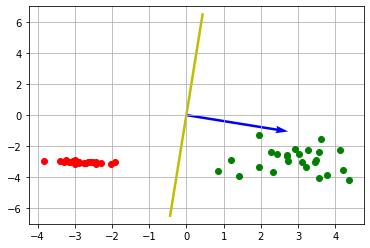

In [110]:
plt.plot(X[:,0][y == -1],X[:,1][y == -1],'ro') 
plt.plot(X[:,0][y == 1],X[:,1][y == 1],'go')
plt.quiver(0,0,w[0],w[1],scale=20,color='b')
plt.quiver(0,0,-w[1],w[0],scale=20,color='y',headaxislength=0,headlength=0)
plt.quiver(0,0,w[1],-w[0],scale=20,color='y',headaxislength=0,headlength=0)
plt.grid()
plt.ylim(-7,7)
plt.show()

## 12
What is the value of loss using the weight vector obtained earlier?  


In [114]:
def loss(X,y,w):
    lss = 0
    for i in range(len(X)):
        y_pred = 1 if w.T @ X[i] >= 0 else -1
        if y_pred != y[i]:
            lss += 1
    return lss
print(loss(X,y,w))

0


# Non-linearly separable case

## 13
Now use a data set that is not linearly separable. Replace occurrences of 0 with -1 and visualize.



In [115]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0.1, class_sep = 2, random_state=20)

In [117]:
y[y == 0] = -1

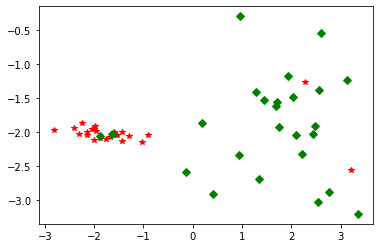

In [118]:
plt.plot(X[:,0][y == -1],X[:,1][y == -1],'r*')
plt.plot(X[:,0][y == 1],X[:,1][y == 1],'gD')
plt.show()

## 14

Apply the Perceptron code again. 

What is the number of weight updates performed in each epoch?


In [119]:
w = np.zeros(X.shape[1])

In [120]:
num_of_mistakes = 0
weight_update_per_epoch = {}

for epoch in range(10):
    weight_update_per_epoch[epoch] = 0
    for i in range(len(X)):
        y_pred = 1 if w.T @ X[i] >= 0 else -1
        if y[i] == y_pred:
            pass
        else:
            w = w + X[i]*y[i]
            weight_update_per_epoch[epoch] += 1
    if weight_update_per_epoch[epoch]:
        num_of_mistakes += weight_update_per_epoch[epoch]
    else:
        break

print("Total mistakes",num_of_mistakes)
print("Epoch in which algo terminated",epoch)

Total mistakes 112
Epoch in which algo terminated 9


In [121]:
print(weight_update_per_epoch)
print(w)

{0: 13, 1: 11, 2: 12, 3: 11, 4: 11, 5: 10, 6: 11, 7: 11, 8: 11, 9: 11}
[ 2.8171108  -0.63769675]


In [122]:
print(loss(X,y,w))

4
